In [1]:
!kaggle datasets download -d surajghuwalewala/ham1000-segmentation-and-classification

Dataset URL: https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 99% 2.57G/2.59G [00:24<00:00, 123MB/s]
100% 2.59G/2.59G [00:24<00:00, 114MB/s]


In [2]:
import zipfile
zippy=zipfile.ZipFile(r'/content/ham1000-segmentation-and-classification.zip')
zippy.extractall('/content')
zippy.close()

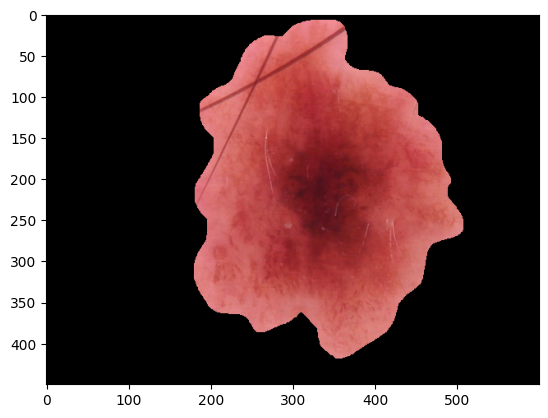

In [4]:
from matplotlib import pyplot as plt
plt.imshow(blacked_out_image)
plt.show()

In [8]:
import pandas as pd
import shutil
import cv2
import numpy as np
import os
df = pd.read_csv(r'GroundTruth.csv')
columns = df.columns
columns= columns[1:]
print(columns)
original_dir='/content/images/'
os.makedirs('/content/train')
for i in columns:
    os.makedirs('/content/train/'+i)
    for j in df[df[i]==1]['image']:
      image = cv2.imread('/content/images/'+j+'.jpg')
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Load the mask
      mask = cv2.imread(('/content/masks/'+j+'_segmentation.png'), cv2.IMREAD_GRAYSCALE)

# Ensure the mask is binary (0 or 255)
      _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

# Black out the regions in the image defined by the mask
      blacked_out_image = image.copy()
      blacked_out_image[binary_mask == 0] = [0, 0, 0]

# Save or display the result
      cv2.imwrite('/content/train/'+i+'/'+j+'.jpg', blacked_out_image)



Index(['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


True

In [9]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/test')
for i in classes:
  os.mkdir('/content/test/'+i)
  files=random.sample(os.listdir('/content/train/'+i),10)
  for j in files:
    shutil.move('/content/train/'+i+'/'+j,'/content/test/'+i)


In [10]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/train1')
for i in classes:
  os.mkdir('/content/train1/'+i)
  files=random.sample(os.listdir('/content/train/'+i),100)
  for j in files:
    shutil.copy('/content/train/'+i+'/'+j,'/content/train1/'+i)


In [ ]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/train2')
for i in classes:
  os.mkdir('/content/train2/'+i)
  files=random.sample(os.listdir('/content/train/'+i),100)
  for j in files:
    shutil.copy('/content/train/'+i+'/'+j,'/content/train2/'+i)

In [ ]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/train3')
for i in classes:
  os.mkdir('/content/train3/'+i)
  files=random.sample(os.listdir('/content/train/'+i),100)
  for j in files:
    shutil.copy('/content/train/'+i+'/'+j,'/content/train3/'+i)

In [ ]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/train4')
for i in classes:
  os.mkdir('/content/train4/'+i)
  files=random.sample(os.listdir('/content/train/'+i),105)
  for j in files:
    shutil.copy('/content/train/'+i+'/'+j,'/content/train4/'+i)

In [16]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
        )

train_generator = train_datagen.flow_from_directory(
        '/content/train1',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
        )

test_generator = train_datagen.flow_from_directory(
        '/content/test',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')



Found 700 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from keras.utils import image_dataset_from_directory as idfd

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable= False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model=Sequential([
    base_model,
    Flatten(),
    Dense(1250,'relu'),

    Dense(100,'relu'),
    Dense(64,'relu'),
    Dense(7,'softmax')
])

In [20]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
for i in df.columns:
  print(i,df[i].value_counts())

image image
ISIC_0024306    1
ISIC_0030986    1
ISIC_0030979    1
ISIC_0030980    1
ISIC_0030981    1
               ..
ISIC_0027645    1
ISIC_0027646    1
ISIC_0027647    1
ISIC_0027648    1
ISIC_0034320    1
Name: count, Length: 10015, dtype: int64
MEL MEL
0.0    8902
1.0    1113
Name: count, dtype: int64
NV NV
1.0    6705
0.0    3310
Name: count, dtype: int64
BCC BCC
0.0    9501
1.0     514
Name: count, dtype: int64
AKIEC AKIEC
0.0    9688
1.0     327
Name: count, dtype: int64
BKL BKL
0.0    8916
1.0    1099
Name: count, dtype: int64
DF DF
0.0    9900
1.0     115
Name: count, dtype: int64
VASC VASC
0.0    9873
1.0     142
Name: count, dtype: int64


In [ ]:

class_weights = {0: 1.0 /6705., 1: 1.0 / 115.}

NameError: name 'train_datagen' is not defined

Epoch 1/5
22/22 [==============================] - 19s 746ms/step - loss: 2.7082 - accuracy: 0.1386 - val_loss: 1.9422 - val_accuracy: 0.1429
Epoch 2/5
22/22 [==============================] - 16s 735ms/step - loss: 1.8869 - accuracy: 0.2814 - val_loss: 1.6220 - val_accuracy: 0.4143
Epoch 3/5
22/22 [==============================] - 17s 763ms/step - loss: 1.6210 - accuracy: 0.3643 - val_loss: 1.5862 - val_accuracy: 0.4286
Epoch 4/5
22/22 [==============================] - 23s 1s/step - loss: 1.5393 - accuracy: 0.3900 - val_loss: 1.5704 - val_accuracy: 0.3857
Epoch 5/5
22/22 [==============================] - 16s 741ms/step - loss: 1.4838 - accuracy: 0.4214 - val_loss: 1.4784 - val_accuracy: 0.4143


In [ ]:
model.fit(train_generator,epochs=22,validation_data=test_generator)

Epoch 1/22
13/22 [================>.............] - ETA: 2:02 - loss: 2.6712 - accuracy: 0.1699

In [ ]:
model.fit(train_generator,epochs=30,validation_data=test_generator,initial_epoch=22)


Epoch 23/30
22/22 [==============================] - 15s 668ms/step - loss: 0.8425 - accuracy: 0.6857 - val_loss: 1.2185 - val_accuracy: 0.5857
Epoch 24/30
22/22 [==============================] - 14s 661ms/step - loss: 0.8504 - accuracy: 0.6729 - val_loss: 1.4794 - val_accuracy: 0.4857
Epoch 25/30
22/22 [==============================] - 14s 617ms/step - loss: 0.8668 - accuracy: 0.6843 - val_loss: 1.2301 - val_accuracy: 0.6143
Epoch 26/30
22/22 [==============================] - 14s 644ms/step - loss: 0.8529 - accuracy: 0.6914 - val_loss: 1.5052 - val_accuracy: 0.5286
Epoch 27/30
22/22 [==============================] - 16s 724ms/step - loss: 0.7510 - accuracy: 0.7200 - val_loss: 1.7191 - val_accuracy: 0.4429
Epoch 28/30
22/22 [==============================] - 15s 669ms/step - loss: 0.8316 - accuracy: 0.6729 - val_loss: 1.2158 - val_accuracy: 0.5286
Epoch 29/30
22/22 [==============================] - 14s 635ms/step - loss: 0.8112 - accuracy: 0.7086 - val_loss: 1.6149 - val_accuracy:

In [ ]:
model.fit(train_generator,epochs=40,validation_data=test_generator,initial_epoch=30)


Epoch 31/40
22/22 [==============================] - 16s 696ms/step - loss: 0.7588 - accuracy: 0.7257 - val_loss: 1.3241 - val_accuracy: 0.5429
Epoch 32/40
22/22 [==============================] - 14s 640ms/step - loss: 0.7314 - accuracy: 0.7314 - val_loss: 1.3139 - val_accuracy: 0.5714
Epoch 33/40
22/22 [==============================] - 14s 637ms/step - loss: 0.7631 - accuracy: 0.7200 - val_loss: 1.5136 - val_accuracy: 0.5571
Epoch 34/40
22/22 [==============================] - 16s 740ms/step - loss: 0.7547 - accuracy: 0.7300 - val_loss: 1.4534 - val_accuracy: 0.6000
Epoch 35/40
22/22 [==============================] - 14s 635ms/step - loss: 0.6535 - accuracy: 0.7643 - val_loss: 1.6272 - val_accuracy: 0.4857
Epoch 36/40
22/22 [==============================] - 14s 645ms/step - loss: 0.7735 - accuracy: 0.7314 - val_loss: 1.5035 - val_accuracy: 0.5714
Epoch 37/40
22/22 [==============================] - 14s 642ms/step - loss: 0.8376 - accuracy: 0.6943 - val_loss: 1.3667 - val_accuracy:

In [ ]:
model.fit(train_generator,epochs=50,validation_data=test_generator,initial_epoch=40)


Epoch 41/50
22/22 [==============================] - 15s 674ms/step - loss: 0.5589 - accuracy: 0.7986 - val_loss: 1.4588 - val_accuracy: 0.5429
Epoch 42/50
22/22 [==============================] - 14s 656ms/step - loss: 0.5339 - accuracy: 0.8129 - val_loss: 1.5815 - val_accuracy: 0.5000
Epoch 43/50
22/22 [==============================] - 14s 647ms/step - loss: 0.5507 - accuracy: 0.7971 - val_loss: 1.7251 - val_accuracy: 0.5000
Epoch 44/50
22/22 [==============================] - 14s 651ms/step - loss: 0.5520 - accuracy: 0.7943 - val_loss: 1.4090 - val_accuracy: 0.6286
Epoch 45/50
22/22 [==============================] - 14s 642ms/step - loss: 0.6319 - accuracy: 0.7671 - val_loss: 1.4860 - val_accuracy: 0.5571
Epoch 46/50
22/22 [==============================] - 16s 716ms/step - loss: 0.6495 - accuracy: 0.7800 - val_loss: 1.4449 - val_accuracy: 0.5286
Epoch 47/50
22/22 [==============================] - 14s 655ms/step - loss: 0.6405 - accuracy: 0.7671 - val_loss: 1.4482 - val_accuracy:

In [ ]:
import random
classes=os.listdir('/content/train')
os.mkdir('/content/test1')
for i in classes:
  os.mkdir('/content/test1/'+i)
  files=random.sample(os.listdir('/content/train/'+i),10)
  for j in files:
    shutil.move('/content/train/'+i+'/'+j,'/content/test1/'+i)

In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True
        )

test_generator = train_datagen.flow_from_directory(
        '/content/test1',
        target_size=(224,224),
        batch_size=32,
        class_mode='categorical')
test_generator.labels

Found 70 images belonging to 7 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
predictions = model.predict(test_generator)  # Example predictions

# Threshold the predictions
thresholded_predictions = np.zeros_like(predictions)
thresholded_predictions[np.arange(len(predictions)), predictions.argmax(1)] = 1

print(thresholded_predictions)

3/3 [==============================] - 1s 327ms/step
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 